# House prices analysis

This is the first excercise of DS workshop.

## About JupyterHub
As you can see, we are using *JupyterHub* environment: To learn more you can visit the official website: https://jupyter.org/hub or a cheat sheet: https://medium.com/edureka/jupyter-notebook-cheat-sheet-88f60d1aca7.

## About MD (markdown)
We are using MD to describe our notebooks, more information at: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

## About Python
During this course we will be using Python as programming language for all data science related tasks. Python basics: https://datacamp-community-prod.s3.amazonaws.com/e30fbcd9-f595-4a9f-803d-05ca5bf84612

## About Pandas
Pandas is Python framework we will be using for data manipulation and ransformation. Cheat sheet at: https://datacamp-community-prod.s3.amazonaws.com/e30fbcd9-f595-4a9f-803d-05ca5bf84612

## About Spark
Apache Spark is highly scalable framework we will be using for the data science related tasks. More information at: https://github.com/runawayhorse001/CheatSheet/raw/master/cheatSheet_pyspark.pdf, https://spark.apache.org/docs/latest/ml-guide.html

<hr />

#### The workshop agenda
- first lets prepare the training data

## Importing packages
At first we must import all the packages we will be using.

Spark libraries

In [0]:
from pyspark.sql import SparkSession
from pyspark.mllib.stat import Statistics
from pyspark.sql.types import *
from pyspark.sql.functions import col, countDistinct, count, when, isnan, expr

Python libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml import Pipeline

#temporary hide error reports
import warnings
warnings.filterwarnings('ignore')

## Reading CSV data

### Spark and Pandas
Throughout the course we will be using 2 frameworks for the data manipulation:
  - Spark: `spark.read.csv("somedata")`
  - Pandas: `pd.read_csv("somedata")`
  
Both frameworks use so called `dataframes`.<br />
![dataframe](https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png)

More informationm about reading CSV with Spark: https://docs.databricks.com/data/data-sources/read-csv.html

`spark.read.csv("somedata")`

  - we can tell spark to use header via: `.option("header", "true")`
  - or to assess schema for us via: `.option("inferSchema", "true")`
  
Many times we will exchange data between these 2 frameworks. Why?
  - Pandas: is great for **small data** manipulation. Such as: data visualization, writing data to screen, simple transformations
  - Spark: is great for **big data** manipulation. Such as: running analytical models, complex transformations

### Transform dataframes between Spark and Pandas   
To transform spark dataframe to Pandas dataframe use: `sparkDf.toPandas()`

To transform Pandas dataframe to spark dataframe use: `spark.createDataFrame(pdDataframe)`

<hr />
  
We will only use a subset of attributes, so we are using `.select()` - other attributes may be interresting for further analysis, but for now we are fine with 25 attributes

In [0]:
trainDataPath = "/FileStore/train.csv"

rawData = spark \
    .read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv(trainDataPath)\
    .select( 'Id', 'SalePrice', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 
            'GrLivArea', 'GarageArea', 'OpenPorchSF', 'MSSubClass', 'MSZoning', 
            'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
            'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'HeatingQC',
            'CentralAir', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
            'GarageCars', 'GarageQual', 'PoolQC')

We can use Pandas framework to display our DataFrame.

Also we could you spark\`s `.show()` method, but Pandas looks better in Jupyetr notebooks

Our data looks like this:

In [0]:
rawData.limit(10).toPandas()

,Id,SalePrice,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageArea,OpenPorchSF,MSSubClass,MSZoning,Neighborhood,HouseStyle,OverallQual,OverallCond,ExterQual,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageQual,PoolQC
0,1,208500,8450,2003,2003,856,1710,548,61,60,RL,CollgCr,2Story,7,5,Gd,PConc,Gd,TA,Ex,Y,Gd,8,0,2,TA,NA
1,2,181500,9600,1976,1976,1262,1262,460,0,20,RL,Veenker,1Story,6,8,TA,CBlock,Gd,TA,Ex,Y,TA,6,1,2,TA,NA
2,3,223500,11250,2001,2002,920,1786,608,42,60,RL,CollgCr,2Story,7,5,Gd,PConc,Gd,TA,Ex,Y,Gd,6,1,2,TA,NA
3,4,140000,9550,1915,1970,756,1717,642,35,70,RL,Crawfor,2Story,7,5,TA,BrkTil,TA,Gd,Gd,Y,Gd,7,1,3,TA,NA
4,5,250000,14260,2000,2000,1145,2198,836,84,60,RL,NoRidge,2Story,8,5,Gd,PConc,Gd,TA,Ex,Y,Gd,9,1,3,TA,NA
5,6,143000,14115,1993,1995,796,1362,480,30,50,RL,Mitchel,1.5Fin,5,5,TA,Wood,Gd,TA,Ex,Y,TA,5,0,2,TA,NA
6,7,307000,10084,2004,2005,1686,1694,636,57,20,RL,Somerst,1Story,8,5,Gd,PConc,Ex,TA,Ex,Y,Gd,7,1,2,TA,NA
7,8,200000,10382,1973,1973,1107,2090,484,204,60,RL,NWAmes,2Story,7,6,TA,CBlock,Gd,TA,Ex,Y,TA,7,2,2,TA,NA
8,9,129900,6120,1931,1950,952,1774,468,0,50,RM,OldTown,1.5Fin,7,5,TA,BrkTil,TA,TA,Gd,Y,TA,8,2,2,Fa,NA
9,10,118000,7420,1939,1950,991,1077,205,4,190,RL,BrkSide,1.5Unf,5,6,TA,BrkTil,TA,TA,Ex,Y,TA,5,2,1,Gd,NA


In [0]:
rawData.show(5, False)

+---+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+------------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+
Id |SalePrice|LotArea|YearBuilt|YearRemodAdd|TotalBsmtSF|GrLivArea|GarageArea|OpenPorchSF|MSSubClass|MSZoning|Neighborhood|HouseStyle|OverallQual|OverallCond|ExterQual|Foundation|BsmtQual|BsmtCond|HeatingQC|CentralAir|KitchenQual|TotRmsAbvGrd|Fireplaces|GarageCars|GarageQual|PoolQC|
+---+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+------------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+
1 |208500 |8450 |2003 |2003 |856 |1710 |548 |61 |60 |RL |CollgCr |2Story |7 |5 |Gd |PConc |Gd |TA |Ex |Y |Gd |8 |0 |2 |TA |NA |
2 |181500 |9600 |1976 |1976 |1262 |1262 |460 |0 |20 |RL |Veenker |1Story |6 |8 |TA |CBlock |Gd |TA |Ex |Y |TA |6 |1 |2 |TA |NA |
3 |223500 |11250 |2001 |2002 |920 |1786 |608 |42 |60 |RL |CollgCr |2Story |7 |5 |Gd |PConc |Gd |TA |Ex |Y |Gd |6 |1 |2 |TA |NA |
4 |140000 |9550 |1915 |1970 |756 |1717 |642 |35 |70 |RL |Crawfor |2Story |7 |5 |TA |BrkTil |TA |Gd |Gd |Y |Gd |7 |1 |3 |TA |NA |
5 |250000 |14260 |2000 |2000 |1145 |2198 |836 |84 |60 |RL |NoRidge |2Story |8 |5 |Gd |PConc |Gd |TA |Ex |Y |Gd |9 |1 |3 |TA |NA |
+---+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+------------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+
only showing top 5 rows

In [0]:
rawData.createOrReplaceTempView("data")
spark.sql('''select * from data''').limit(10).toPandas()

,Id,SalePrice,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageArea,OpenPorchSF,MSSubClass,MSZoning,Neighborhood,HouseStyle,OverallQual,OverallCond,ExterQual,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageQual,PoolQC
0,1,208500,8450,2003,2003,856,1710,548,61,60,RL,CollgCr,2Story,7,5,Gd,PConc,Gd,TA,Ex,Y,Gd,8,0,2,TA,NA
1,2,181500,9600,1976,1976,1262,1262,460,0,20,RL,Veenker,1Story,6,8,TA,CBlock,Gd,TA,Ex,Y,TA,6,1,2,TA,NA
2,3,223500,11250,2001,2002,920,1786,608,42,60,RL,CollgCr,2Story,7,5,Gd,PConc,Gd,TA,Ex,Y,Gd,6,1,2,TA,NA
3,4,140000,9550,1915,1970,756,1717,642,35,70,RL,Crawfor,2Story,7,5,TA,BrkTil,TA,Gd,Gd,Y,Gd,7,1,3,TA,NA
4,5,250000,14260,2000,2000,1145,2198,836,84,60,RL,NoRidge,2Story,8,5,Gd,PConc,Gd,TA,Ex,Y,Gd,9,1,3,TA,NA
5,6,143000,14115,1993,1995,796,1362,480,30,50,RL,Mitchel,1.5Fin,5,5,TA,Wood,Gd,TA,Ex,Y,TA,5,0,2,TA,NA
6,7,307000,10084,2004,2005,1686,1694,636,57,20,RL,Somerst,1Story,8,5,Gd,PConc,Ex,TA,Ex,Y,Gd,7,1,2,TA,NA
7,8,200000,10382,1973,1973,1107,2090,484,204,60,RL,NWAmes,2Story,7,6,TA,CBlock,Gd,TA,Ex,Y,TA,7,2,2,TA,NA
8,9,129900,6120,1931,1950,952,1774,468,0,50,RM,OldTown,1.5Fin,7,5,TA,BrkTil,TA,TA,Gd,Y,TA,8,2,2,Fa,NA
9,10,118000,7420,1939,1950,991,1077,205,4,190,RL,BrkSide,1.5Unf,5,6,TA,BrkTil,TA,TA,Ex,Y,TA,5,2,1,Gd,NA


**LotArea**:
    _Lot size in square feet_
    
**YearBuilt**:
    _Original construction date_
    
**YearRemodAdd**:
    _Remodel date (same as construction date if no remodeling or additions)_
    
**TotalBsmtSF**:
    _Total square feet of basement area_
    
**GrLivArea**:
    _Above grade (ground) living area square feet_

**GarageArea**:
    _Size of garage in square feet_
    
**OpenPorchSF**:
    _Open porch area in square feet_
    
**MSSubClass**:
    _Identifies the type of dwelling involved in the sale._
  - **20**: _1-STORY 1946 & NEWER ALL STYLES_
  - **30**: _1-STORY 1945 & OLDER_
  - **40**: _1-STORY W/FINISHED ATTIC ALL AGES_
  - **45**: _1-1/2 STORY - UNFINISHED ALL AGES_
  - **50**: _1-1/2 STORY FINISHED ALL AGES_
  - **60**: _2-STORY 1946 & NEWER_
  - **70**: _2-STORY 1945 & OLDER_
  - **75**: _2-1/2 STORY ALL AGES_
  - **80**: _SPLIT OR MULTI-LEVEL_
  - **85**: _SPLIT FOYER_
  - **90**: _DUPLEX - ALL STYLES AND AGES_
  - **120**: _1-STORY PUD (Planned Unit Development) - 1946 & NEWER_
  - **150**: _1-1/2 STORY PUD - ALL AGES_
  - **160**: _2-STORY PUD - 1946 & NEWER_
  - **180**: _PUD - MULTILEVEL - INCL SPLIT LEV/FOYER_
  - **190**: _2 FAMILY CONVERSION - ALL STYLES AND AGES_
       
**OverallQual**:
    _Rates the overall material and finish of the house_
    
**OverallCond**:
    _Rates the overall condition of the house_
  - **10**: _Very Excellent_
  - **9**: 	_Excellent_
  - **8**: 	_Very Good_
  - **7**: 	_Good_
  - **6**: 	_Above Average_
  - **5**: 	_Average_
  - **4**: 	_Below Average_
  - **3**: 	_Fair_
  - **2**: 	_Poor_
  - **1**: 	_Very Poor_
  
**TotRmsAbvGrd**:
	_Total rooms above grade (does not include bathrooms)_

**Fireplaces**:
	_Number of fireplaces_

**GarageCars**:
	_Size of garage in car capacity_

**Neighborhood**:
	_sorted by avg price - 1-highest, 25-lowest_

**MSZoning**:
	_Identifies the general zoning classification of the sale._
  - **A**: 	_Agriculture_
  - **C**: 	_Commercial_
  - **FV**: 	_Floating Village Residential_
  - **I**: 	_Industrial_
  - **RH**: 	_Residential High Density_
  - **RL**: 	_Residential Low Density_
  - **RP**: 	_Residential Low Density Park_
  - **RM**: 	_Residential Medium Density_
	   
**HouseStyle**:
	_Style of dwelling_
  - **1Story**: 	_One story_
  - **1.5Fin**: 	_One and one-half story: 2nd level finished_
  - **1.5Unf**: 	_One and one-half story: 2nd level unfinished_
  - **2Story**: 	_Two story_
  - **2.5Fin**: 	_Two and one-half story: 2nd level finished_
  - **2.5Unf**: 	_Two and one-half story: 2nd level unfinished_
  - **SFoyer**: 	_Split Foyer_
  - **SLvl**: 	_Split Level_
       
**ExterQual**:
	_Evaluates the quality of the material on the exterior_
  - **Ex:** 	_Excellent_
  - **Gd:** 	_Good_
  - **TA:** 	_Average/Typical_
  - **Fa:** 	_Fair_
  - **Po:** 	_Poor_
       
**Foundation**:
	_Type of foundation_
  - **BrkTil**: 	_Brick & Tile_
  - **Cblock**: 	_Cinder Block_
  - **Pconc**: 	_Poured Contrete_	
  - **Slab**: 	_Slab_
  - **Stone**: 	_Stone_
  - **Wood**: 	_Wood_
       
**BsmtQual**:
	_Evaluates the height of the basement_
  - **Ex**	_Excellent (100+ inches)_
  - **Gd**	_Good (90-99 inches)_
  - **TA**	_Typical (80-89 inches)_
  - **Fa**	_Fair (70-79 inches)_
  - **Po**	_Poor (<70 inches_
  - **NA**	_No Basement_

**BsmtCond**:
	_Evaluates the general condition of the basement_
  - **Ex:** _Excellent_
  - **Gd:** _Good_
  - **TA:** _Typical - slight dampness allowed_
  - **Fa:** _Fair - dampness or some cracking or settling_
  - **Po:** _Poor - Severe cracking, settling, or wetness_
  - **NA:** _No Basement_
       
**HeatingQC**:
	_Heating quality and condition_
  - **Ex:** _Excellent_
  - **Gd:** _Good_
  - **TA:** _Average/Typical_
  - **Fa:** _Fair_
  - **Po:** _Poor_
       
**CentralAir**:
	_Central air conditioning_
  - **N**: 	_No_
  - **Y**: 	_Yes_

**KitchenQual**:
	_Kitchen quality_
  - **Ex**: _Excellent_
  - **Gd**: _Good_
  - **TA**: _Typical/Average_
  - **Fa**: _Fair_
  - **Po**: _Poor_
       
**GarageQual**:
	_Garage quality_
  - **Ex**: _Excellent_
  - **Gd**: _Good_
  - **TA**: _Typical/Average_
  - **Fa**: _Fair_
  - **Po**: _Poor_
  - **NA**: _No Garage_
       
**PoolQC**:
	_Pool quality_
  - **Ex**: _Excellent_
  - **Gd**: _Good_
  - **TA**: _Average/Typical_
  - **Fa**: _Fair_
  - **NA**: _No Pool_

## SQL reprocessing
Change Neighborhood name from original value to rank ordered by average price of houses in that Neighborhood<br>
Neighborhood names are hard to evaluate for us, but rank is much easier to work with

Also we add price range which is `NTILE(10)` ordered by SalePrice

In [0]:

cleanData = spark.sql("""
select
    a.*
    , cast(b.Neighborhood_new as string) as Neighborhood_new
    , cast(ntile(10) over (order by SalePrice) as double) PriceNtile
from
    data a
left join
    (
        select 
            Neighborhood, 
            rank() over (order by avg(SalePrice) desc) Neighborhood_new
        from 
            data
        group by
            1
    ) b using (Neighborhood)
""").drop("Neighborhood").withColumnRenamed("Neighborhood_new", "Neighborhood")

You can do with spark dataframe all operation that you know from SQL:

**WHERE**

In [0]:
spark.sql('''select count(1) as cnt from data where SalePrice >= 150000''').show()

+---+
cnt|
+---+
845|
+---+

In [0]:
cleanData.where(col("SalePrice") >= 150000).count()

Out[9]: 845

**GROUP BY**

In [0]:
spark.sql('''select YearBuilt, count(1) as cnt from data group by YearBuilt order by YearBuilt''').show(5)

+---------+---+
YearBuilt|cnt|
+---------+---+
 1872| 1|
 1875| 1|
 1880| 4|
 1882| 1|
 1885| 2|
+---------+---+
only showing top 5 rows

In [0]:
cleanData.groupBy("YearBuilt").count().orderBy("YearBuilt").show(5)

+---------+-----+
YearBuilt|count|
+---------+-----+
 1872| 1|
 1875| 1|
 1880| 4|
 1882| 1|
 1885| 2|
+---------+-----+
only showing top 5 rows

**Analytical funcions**

In [0]:
spark.sql('''
select 
    YearBuilt
    , SalePrice
    , avg(SalePrice) over (partition by YearBuilt) as avg_price_per_year 
from data order by YearBuilt''').show(10)

+---------+---------+------------------+
YearBuilt|SalePrice|avg_price_per_year|
+---------+---------+------------------+
 1872| 122000| 122000.0|
 1875| 94000| 94000.0|
 1880| 295000| 200619.75|
 1880| 117500| 200619.75|
 1880| 124000| 200619.75|
 1880| 265979| 200619.75|
 1882| 168000| 168000.0|
 1885| 100000| 111250.0|
 1885| 122500| 111250.0|
 1890| 159500| 142200.0|
+---------+---------+------------------+
only showing top 10 rows

In [0]:
cleanData.select("YearBuilt", "SalePrice", expr("avg(SalePrice) over (partition by YearBuilt)").alias("avg_price_per_year"))\
    .orderBy("YearBuilt").show(10) 

+---------+---------+------------------+
YearBuilt|SalePrice|avg_price_per_year|
+---------+---------+------------------+
 1872| 122000| 122000.0|
 1875| 94000| 94000.0|
 1880| 295000| 200619.75|
 1880| 117500| 200619.75|
 1880| 124000| 200619.75|
 1880| 265979| 200619.75|
 1882| 168000| 168000.0|
 1885| 100000| 111250.0|
 1885| 122500| 111250.0|
 1890| 159500| 142200.0|
+---------+---------+------------------+
only showing top 10 rows

**JOIN**

In [0]:
col1 = ["Id", "SalePrice", "LotArea", "YearBuilt"]
col2 = ["Id", "YearRemodAdd", "TotalBsmtSF", "GrLivArea"]

df1 = cleanData.select(col1)
df2 = cleanData.select(col2)

df1.join(df2, ["Id"]).show(5)

+---+---------+-------+---------+------------+-----------+---------+
 Id|SalePrice|LotArea|YearBuilt|YearRemodAdd|TotalBsmtSF|GrLivArea|
+---+---------+-------+---------+------------+-----------+---------+
 1| 208500| 8450| 2003| 2003| 856| 1710|
 2| 181500| 9600| 1976| 1976| 1262| 1262|
 3| 223500| 11250| 2001| 2002| 920| 1786|
 4| 140000| 9550| 1915| 1970| 756| 1717|
 5| 250000| 14260| 2000| 2000| 1145| 2198|
+---+---------+-------+---------+------------+-----------+---------+
only showing top 5 rows

Something Spark can do even better

**Columns processing**

We want to sum all area columns

In [0]:
spark.sql('''
select LotArea + GrLivArea + GarageArea as area_number 
from data order by Id''').show(5)

+-----------+
area_number|
+-----------+
 10708|
 11322|
 13644|
 11909|
 17294|
+-----------+
only showing top 5 rows

In [0]:
area_cols = [c for c in cleanData.columns if "Area" in c]

cleanData.orderBy("Id").select(sum(col(c) for c in area_cols).alias("area_number")).show(5)

+-----------+
area_number|
+-----------+
 10708|
 11322|
 13644|
 11909|
 17294|
+-----------+
only showing top 5 rows

**Another example**

We want to calculate the distinct number of values for each columns

In [0]:
spark.sql('''
select 
    count(distinct Id) as id 
    ,count(distinct SalePrice) as SalePrice 
    ,count(distinct LotArea) as LotArea 
    ,count(distinct YearBuilt) as YearBuilt
    ,count(distinct YearRemodAdd) as YearRemodAdd
    ,count(distinct TotalBsmtSF) as TotalBsmtSF
    ,count(distinct GrLivArea) as GrLivArea
    ,count(distinct GarageArea) as GarageArea
    ,count(distinct OpenPorchSF) as OpenPorchSF
    ,count(distinct MSSubClass) as MSSubClass
    ,count(distinct MSZoning) as MSZoning
    ,count(distinct HouseStyle) as HouseStyle
    ,count(distinct OverallQual) as OverallQual
    ,count(distinct OverallCond) as OverallCond
    ,count(distinct ExterQual) as ExterQual
    ,count(distinct Foundation) as Foundation
    ,count(distinct BsmtQual) as BsmtQual
    ,count(distinct BsmtCond) as BsmtCond
    ,count(distinct HeatingQC) as HeatingQC
    ,count(distinct CentralAir) as CentralAir
    ,count(distinct KitchenQual) as KitchenQual
    ,count(distinct TotRmsAbvGrd) as TotRmsAbvGrd
    ,count(distinct Fireplaces) as Fireplaces
    ,count(distinct GarageCars) as GarageCars
    ,count(distinct GarageQual) as GarageQual
    ,count(distinct PoolQC) as PoolQC
    ,count(distinct Neighborhood) as Neighborhood
from data''').show()

+----+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+------------+
 id|SalePrice|LotArea|YearBuilt|YearRemodAdd|TotalBsmtSF|GrLivArea|GarageArea|OpenPorchSF|MSSubClass|MSZoning|HouseStyle|OverallQual|OverallCond|ExterQual|Foundation|BsmtQual|BsmtCond|HeatingQC|CentralAir|KitchenQual|TotRmsAbvGrd|Fireplaces|GarageCars|GarageQual|PoolQC|Neighborhood|
+----+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+------------+
1460| 663| 1073| 112| 61| 721| 861| 441| 202| 15| 5| 8| 10| 9| 4| 6| 5| 5| 5| 2| 4| 12| 4| 5| 6| 4| 25|
+----+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+------------+

In [0]:
cleanData.agg(*(countDistinct(col(c)).alias(c) for c in cleanData.columns)).show()

+----+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+------------+----------+
 Id|SalePrice|LotArea|YearBuilt|YearRemodAdd|TotalBsmtSF|GrLivArea|GarageArea|OpenPorchSF|MSSubClass|MSZoning|HouseStyle|OverallQual|OverallCond|ExterQual|Foundation|BsmtQual|BsmtCond|HeatingQC|CentralAir|KitchenQual|TotRmsAbvGrd|Fireplaces|GarageCars|GarageQual|PoolQC|Neighborhood|PriceNtile|
+----+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+------------+----------+
1460| 663| 1073| 112| 61| 721| 861| 441| 202| 15| 5| 8| 10| 9| 4| 6| 5| 5| 5| 2| 4| 12| 4| 5| 6| 4| 25| 10|
+----+---------+-------+---------+------------+-----------+---------+----------+-----------+----------+--------+----------+-----------+-----------+---------+----------+--------+--------+---------+----------+-----------+------------+----------+----------+----------+------+------------+----------+

In [0]:
featureDistinctCounts = cleanData.agg(*(countDistinct(col(c)).alias(c) for c in cleanData.columns)).toPandas().transpose()
featureDistinctCounts.columns=['distinctCount']
rowCount = cleanData.count()

## Storing the data on disk

We write data as parquet

In [0]:
cleanData.write.mode('overwrite').parquet("/FileStore/cleanData")

## Variable distribution

First of all we will have a look at data types assessed by spark.
We create 4 arrays: `integerFeatures`, `stringFeatures`, `doubleFeatures`, `otherTypeFeatures` and asign each feature to one of them.

next we will assign features to one of these groups:

  - **Categorical feature**: Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method.

  - **Continuous(numeric) feature**: Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.
  
![feature types](https://cdn.shopify.com/s/files/1/1334/2321/articles/Picture1.png?v=1497575369)

For further demonstration, we choose a few numerical and categorical variables.

In [0]:
numericalFeatures = ["LotArea", "YearBuilt", "GarageArea"]
categoricalFeatures =  ["MSZoning", "HouseStyle"]

## Data Visualizations 
We are using Seaborn/Matplotlib for this visualization. To learn more see: https://seaborn.pydata.org/

Why to use Python for visualisation:
- all setting in one place
- scalability
- repeatable usage 

**color palette**: we re using `Set2` palette, but you can pick any palette you like. To learn more: https://seaborn.pydata.org/tutorial/color_palettes.html

## Histograms
We use histogram to visualize distribution of numeric features

In [0]:
clr = "#c2c1f2"
pltt = "Set2"
sns.set_palette(pltt)
plt.rcParams.update({'figure.max_open_warning': 0})

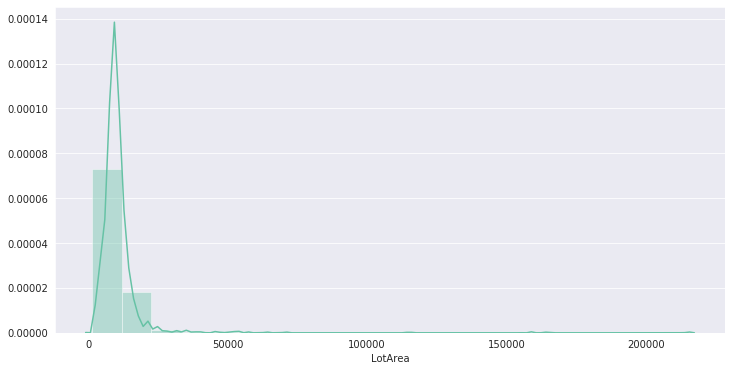

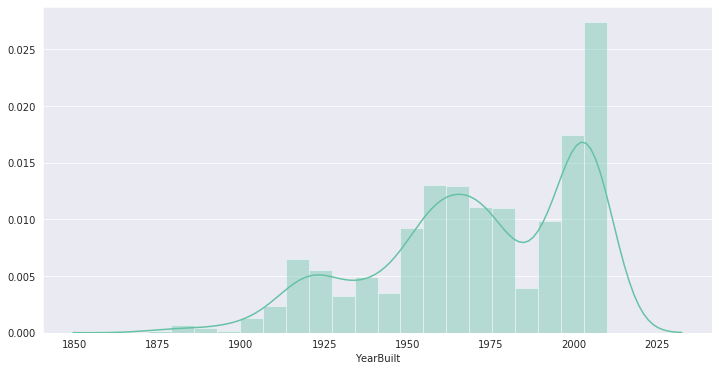

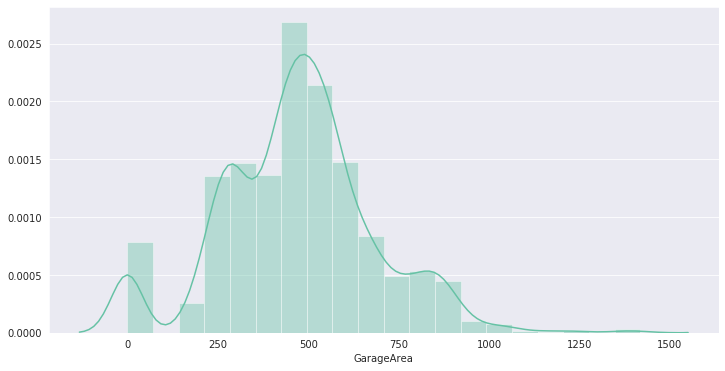

In [0]:
def histogram(x, bins):
  plt.figure()
  sns.set_style("darkgrid")
  f, ax = plt.subplots(figsize=(12, 6))
  sns.distplot(x, bins = bins, kde = True )
  plt.grid(axis = 'x')
  return;

for c in numericalFeatures: 
  histogram(cleanData.toPandas()[c].dropna(), 20)

## Correlation matrix

Another great way to visualize relationship between variables is correlation matrix

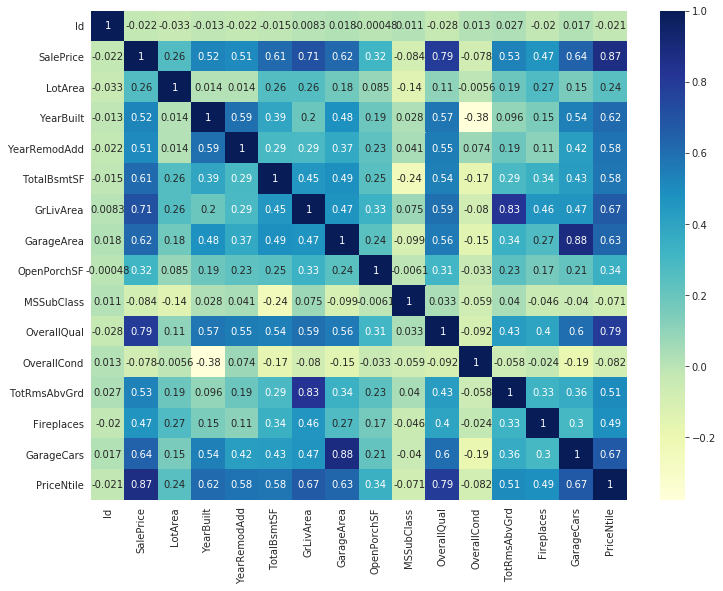

In [0]:
corrmat = cleanData.toPandas().corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu", annot=True);